# ***RFM Analysis*** 

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Load Dataset

In [4]:
df = pd.read_csv("../data/processed/Customer_Segmentation/Customer_Segementation.csv")

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceDateOnly
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2022-12-01
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2022-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022-12-01


### Check for null values

In [6]:
df.isna().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
TotalPrice         0
InvoiceDateOnly    0
dtype: int64

## Compute RFM Metrics 

In [9]:
# InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
recency_df['Recency'] = (reference_date - recency_df['InvoiceDate']).dt.days
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
monetary_df = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

## Plot Histograms

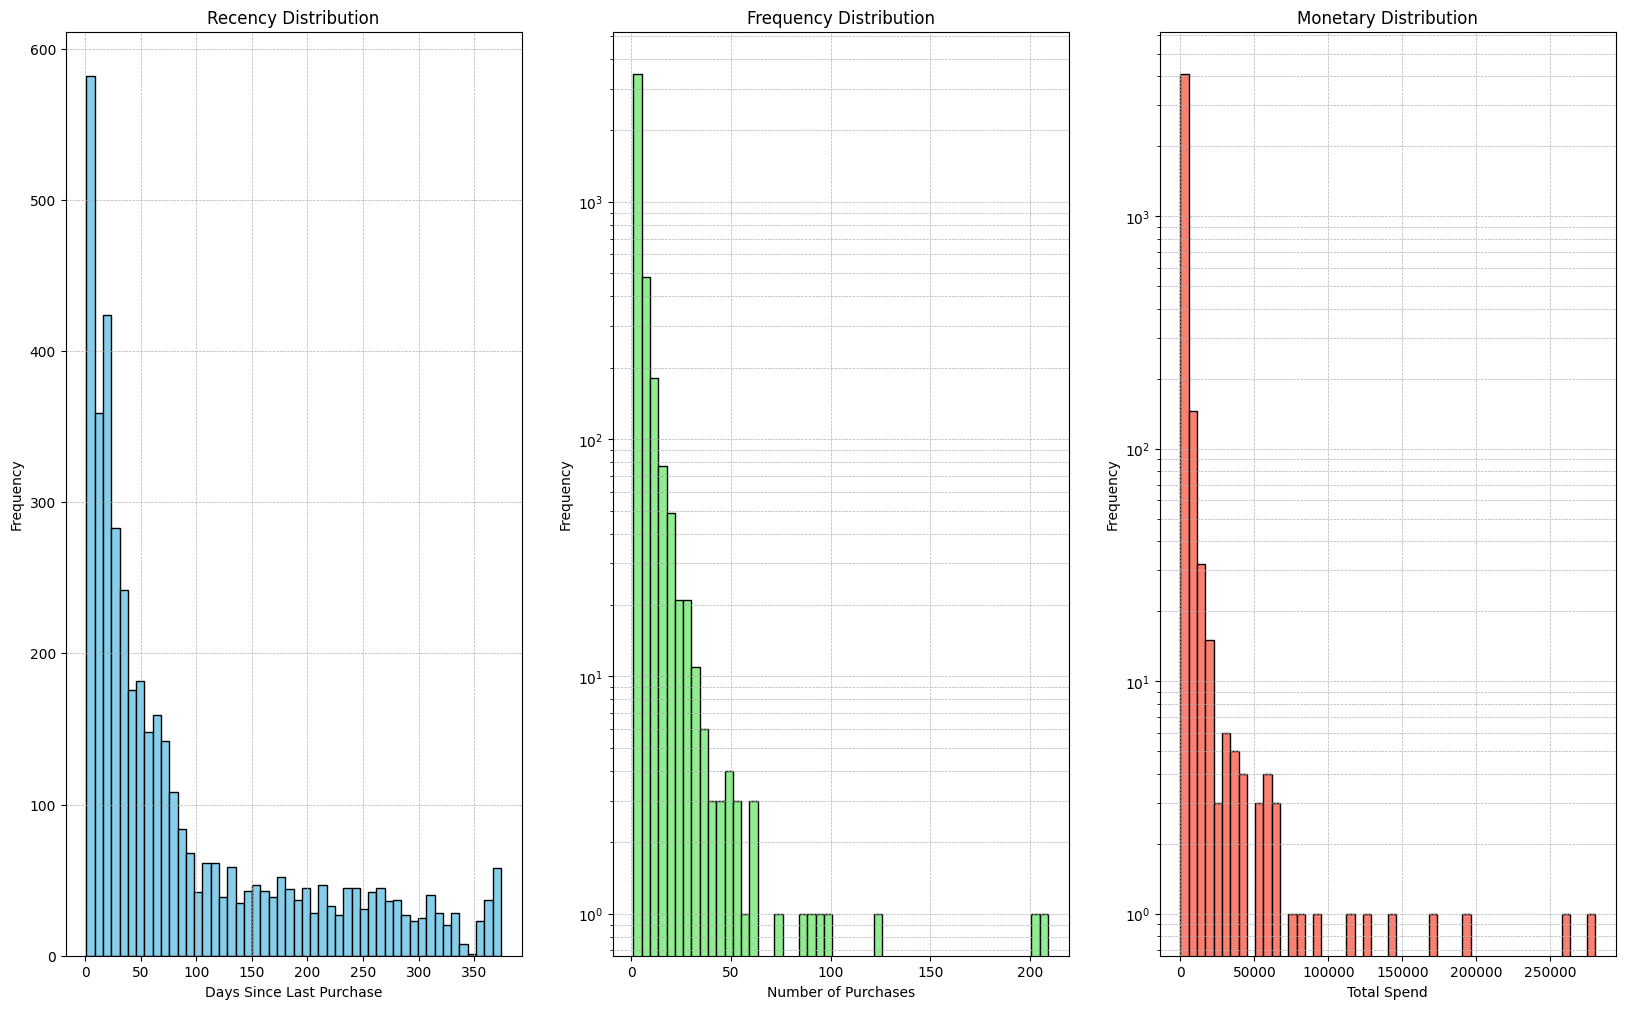

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 12))

axes[0].hist(rfm_df['Recency'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days Since Last Purchase')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', linewidth=0.5)

axes[1].hist(rfm_df['Frequency'], bins=50, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Purchases')
axes[1].set_ylabel('Frequency')
axes[1].set_yscale('log')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[2].hist(rfm_df['Monetary'], bins=50, color='salmon', edgecolor='black')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total Spend')
axes[2].set_ylabel('Frequency')
axes[2].set_yscale('log')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("../visuals/After_Cleaning/Customer_Segmentation/Rfm/histogram.png")

### Add Boxplots

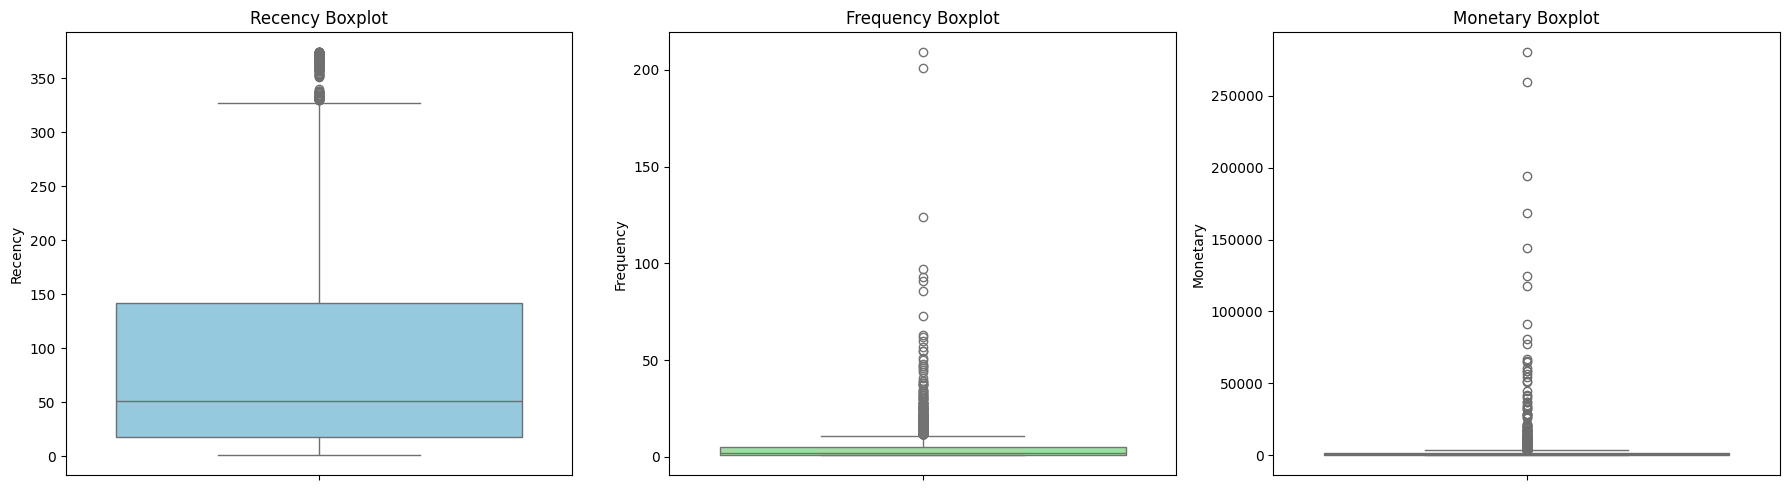

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Ensure 3 plots

sns.boxplot(y='Recency', data=rfm_df, ax=axes[0], color='skyblue')
axes[0].set_title('Recency Boxplot')

sns.boxplot(y='Frequency', data=rfm_df, ax=axes[1], color='lightgreen')
axes[1].set_title('Frequency Boxplot')

sns.boxplot(y='Monetary', data=rfm_df, ax=axes[2], color='salmon')
axes[2].set_title('Monetary Boxplot')

plt.tight_layout()

# Save before showing/closing
plt.savefig('../visuals/After_Cleaning/Customer_Segmentation/Rfm/rfm_distributions_enhanced.png')
plt.show()
plt.close()

### Scatter Plot: Frequency vs. Monetary

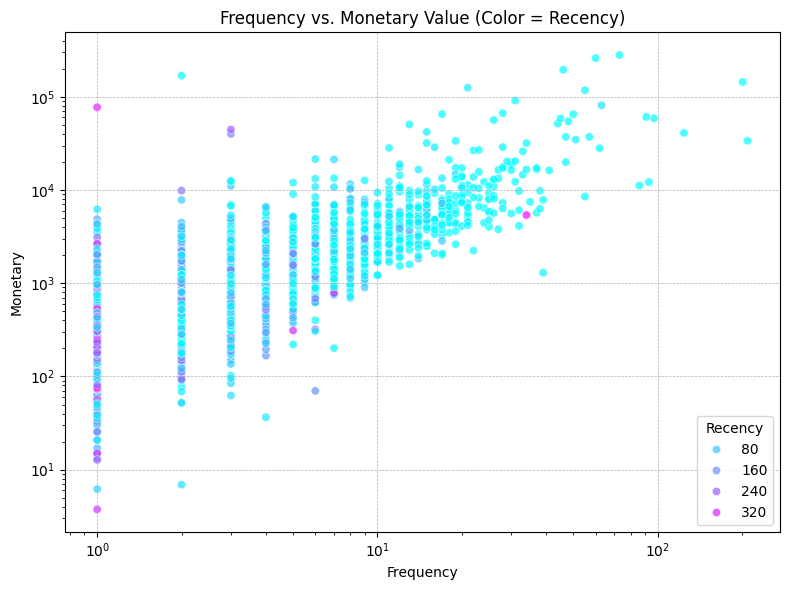

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary', hue='Recency', palette='cool', alpha=0.7)
plt.title('Frequency vs. Monetary Value (Color = Recency)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('../visuals/After_Cleaning/Customer_Segmentation/Rfm/frequency_vs_monetary.png')
plt.show()
plt.close()

### Correlation Heatmap

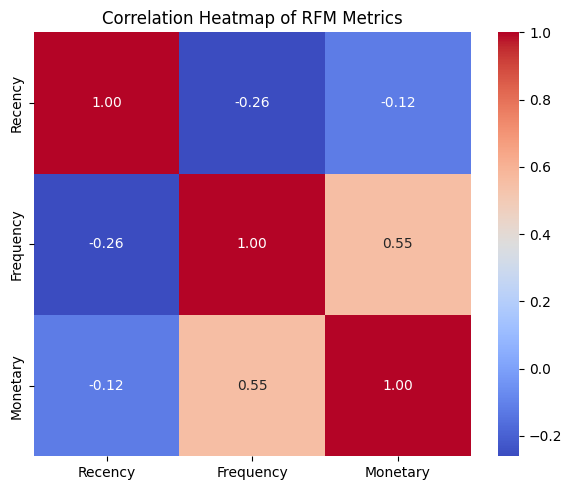

In [23]:
plt.figure(figsize=(6, 5))
sns.heatmap(rfm_df[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of RFM Metrics')
plt.tight_layout()
plt.savefig('../visuals/After_Cleaning/Customer_Segmentation/Rfm/rfm_correlation_heatmap.png')
plt.show()
plt.close()

### Optional: Pairplot

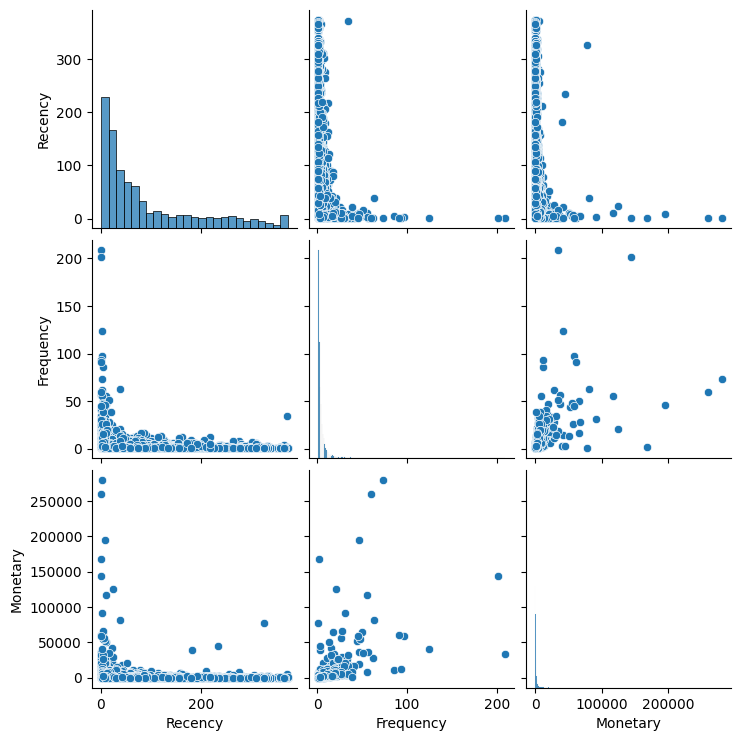

<Figure size 640x480 with 0 Axes>

In [24]:
sns.pairplot(rfm_df[['Recency', 'Frequency', 'Monetary']])
plt.show()
plt.savefig('../visuals/After_Cleaning/Customer_Segmentation/Rfm/rfm_pairplot.png')

## Summary of Insights:
#### Recency Distribution is right-skewed — most customers have not purchased recently.

#### Frequency Distribution shows that a majority of customers purchased only once or twice. The log scale highlights a few very frequent buyers.

#### Monetary Distribution is also right-skewed — few customers account for large revenue (Pareto effect).

#### Boxplots reveal extreme outliers, especially in Monetary and Frequency — important for customer segmentation.

#### Scatter Plot of Frequency vs. Monetary shows:

    - A positive correlation: more purchases generally lead to higher spending.

    - Customers with high frequency and low recency = loyal, active customers.

#### Correlation Heatmap:

    - Frequency & Monetary show strong positive correlation.

    - Recency is weakly (negatively) correlated with both — recent buyers are often more valuable but not always.



In [ ]:
from sklearn.preprocessing import StandardScaler


# --- 3. Calculate RFM Features ---
print("Step 2: Calculating RFM features...")

# Set the reference date as one day after the last transaction date
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate Recency, Frequency, and Monetary values for each customer
rfm_df = df.groupby('CustomerID').agg(
    # Recency: Calculate the number of days since the last purchase
    Recency=('InvoiceDate', lambda date: (reference_date - date.max()).days),
    # Frequency: Count the number of unique invoices
    Frequency=('InvoiceNo', 'nunique'),
    # Monetary: Sum the TotalPrice
    Monetary=('TotalPrice', 'sum')
).reset_index()

print("RFM features calculated. Preview of RFM DataFrame:")
print(rfm_df.head())
print("\n")


# --- 4. Standardize/Normalize RFM Values ---
print("Step 3: Standardizing RFM values for clustering...")

# Exclude 'CustomerID' and create a new DataFrame with only RFM values
rfm_values = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the RFM values and transform the data
scaled_rfm = scaler.fit_transform(rfm_values)

# Create a new DataFrame with the standardized values and a CustomerID column
scaled_rfm_df = pd.DataFrame(scaled_rfm, columns=['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled'])
scaled_rfm_df['CustomerID'] = rfm_df['CustomerID']

print("RFM values have been standardized. Preview of the scaled DataFrame:")
print(scaled_rfm_df.head())
print("\n")

print("The final 'scaled_rfm_df' is now ready for clustering algorithms like K-Means.")